# Exam 10/01/2025

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **matrix-II.mat**.
 - Si risolva ciascuno dei sistemi lineari assegnati  utilizzato il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate. **punti 5**
 - Per il primo sistema lineare A x= b,  aggiungere una perturbazione dell' 1% sulla componente b[0]  del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria, richiamando il teorema relativo. **punti 3**     

Dato il sistema lineare A2 x2 = b2 dove A2 = np.array([[8, 0, 1], [0, 12, 2], [1, 2, -14.0]]) | b2 = np.array([9.0, 14.0, -11.0])
 - Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di matrici **punti[1]**.
 - Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A2 x2 = b2 con  **punti[3]**.

Totale **Punti 12**

 

In [139]:
from SolveTriangular import *
import numpy as np
import scipy.linalg


def gauss_seidel(A, b, x0, max_it=100, toll=1e-12):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = invM @ N
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)

    er = []
    while len(er) <= max_it and errore >= toll:
        x, flag = Lsolve(M, b - F @ x0)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er.append(errore)
        x0 = x.copy()

    return x, er, len(er)


def steepestdescent(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        Ap = A @ r
        alpha = (r.T @ r) / (r.T @ Ap)
        x = x + alpha * r
        r = b - A @ x
        errore = np.linalg.norm(r) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        it += 1

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it


def conjugate_gradient(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        it += 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / (p.T @ Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        errore = np.linalg.norm(r_new) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        if errore < toll:
            break
        gamma = (r_new.T @ r_new) / rtr
        p = r_new + gamma * p
        r = r_new

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it


def SVDLS(A, b):
    m, n = A.shape
    U, s, VT = scipy.linalg.svd(A)

    V = VT.T
    # Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    thresh = np.spacing(1) * m * s[0]
    k = np.count_nonzero(s > thresh)
    print("rango =", k)

    d = U.T @ b
    d1 = d[:k].reshape(k, 1)
    s1 = s[:k].reshape(k, 1)

    c = d1 / s1
    x = V[:, :k] @ c

    return x, np.linalg.norm(d[k:]) ** 2


def qrLS(A, b):
    n = A.shape[1]
    Q, R = scipy.linalg.qr(A)
    h = Q.T @ b
    x, _ = Usolve(R[0:n, :], h[0:n])

    return x, np.linalg.norm(h[n:]) ** 2

=== ANALISI MATRICE A ===
[A] è quadrata? True
[A] è grande? Dimensione: 20
[A] è sparsa? True
[A] è simmetrica e definita positiva? True
[A] condizionamento 9999.999999998083

=== ANALISI MATRICE A1 ===
[A1] è quadrata? False
[A1] è grande? Dimensione: 20
[A1] è sparsa? False
[A1] condizionamento 1.5940716803849085e+17

=== ANALISI MATRICE A2 ===
[A2] è quadrata? True
[A2] è grande? Dimensione: 3
[A2] è sparsa? False
[A2] è simmetrica e definita positiva? False
[A2] condizionamento 1.7651462497889765

=== RISOLUZIONE SISTEMA A x = b ===
SCELTA METODO: Confronto tra metodi iterativi
MOTIVAZIONE: A è simmetrica e definita positiva, sparsa, moderatamente mal condizionata
- Gauss-Seidel: metodo generale per matrici sparse
- Steepest Descent: per matrici simmetriche definite positive
- Gradiente Coniugato: OTTIMALE per matrici simmetriche definite positive
raggio spettrale Gauss-Seidel  0.9964399151691916
[A] iterazioni Gauss-Seidel: 2001
[A] iterazioni Steepest Descent: 2000
[A] iterazion

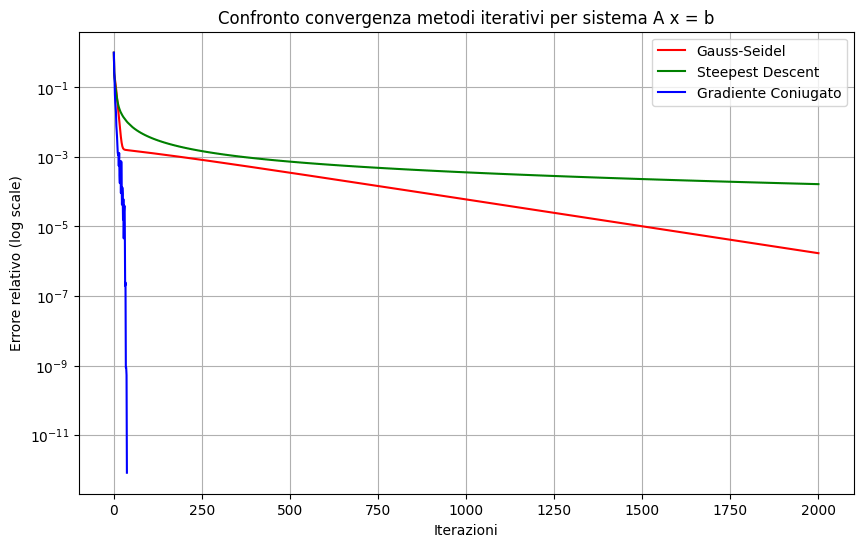


=== ANALISI DELLA PERTURBAZIONE (Teorema di Perturbazione) ===
OBIETTIVO: Verificare l'effetto di una perturbazione dell'1% su b[0]
Perturbazione applicata: [1.] % su b[0]
Errore relativo sui dati: 0.00065107
Errore relativo sulla soluzione: 0.10723162
Fattore di amplificazione: 164.7
Numero di condizionamento: 10000.0
Limite teorico superiore: 6.51067170
VERIFICA TEOREMA: 0.10723162 ≤ 6.51067170 -> ✓ VERIFICATO

=== RISOLUZIONE SISTEMA A1 x1 = b1 (SOVRADETERMINATO) ===
CARATTERISTICHE: Sistema sovradeterminato (più equazioni che incognite)
CONDIZIONAMENTO: Severamente mal condizionato (cond ≈ 1.6×10^17)
SCELTA METODO: SVD (Singular Value Decomposition)
MOTIVAZIONE: SVD è il metodo più stabile per sistemi mal condizionati e rank-deficient
- Gestisce automaticamente il rank deficiency
- Fornisce la soluzione ai minimi quadrati più stabile numericamente
rango = 13
Soluzione ottenuta con SVD
Residuo: 3.380392e-30
Norma della soluzione: 3.573972e+00

=== RISOLUZIONE SISTEMA A2 x2 = b2 ===

In [140]:
from scipy.io import loadmat
import matplotlib.pylab as plt
import numpy as np

# Caricamento dei dati dal file MATLAB
dati = loadmat("./mat/matrix-II.mat")
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)

A1 = dati["A1"]
A1 = A1.astype(float)
b1 = dati["b1"]
b1 = b1.astype(float)

# Sistema lineare A2 x2 = b2 definito nell'esercizio
A2 = np.array([[8, 0, 1], [0, 12, 2], [1, 2, -14.0]])
b2 = np.array([9.0, 14.0, -11.0])


def isSparse(A):
    """Verifica se una matrice è sparsa (meno del 33% di elementi non nulli)"""
    return np.count_nonzero(A) / A.size < 0.33


def isSimmetric(A):
    """Verifica se una matrice è simmetrica"""
    return np.allclose(A.T, A)


def isPositive(A):
    """Verifica se una matrice è simmetrica e definita positiva"""
    return isSimmetric(A) and np.all(np.linalg.eigvals(A) > 0)


def testMatriceQuadrata(A):
    """Verifica se una matrice è quadrata"""
    return A.shape[0] == A.shape[1]


# ===== ANALISI DELLE CARATTERISTICHE DELLE MATRICI =====

print("=== ANALISI MATRICE A ===")
print("[A] è quadrata?", testMatriceQuadrata(A))
print("[A] è grande? Dimensione:", A.shape[0])
print("[A] è sparsa?", isSparse(A))
print("[A] è simmetrica e definita positiva?", isPositive(A))
print("[A] condizionamento", np.linalg.cond(A))

print("")

print("=== ANALISI MATRICE A1 ===")
print("[A1] è quadrata?", testMatriceQuadrata(A1))
print("[A1] è grande? Dimensione:", A1.shape[0])
print("[A1] è sparsa?", isSparse(A1))
print("[A1] condizionamento", np.linalg.cond(A1))

print("")

print("=== ANALISI MATRICE A2 ===")
print("[A2] è quadrata?", testMatriceQuadrata(A2))
print("[A2] è grande? Dimensione:", A2.shape[0])
print("[A2] è sparsa?", isSparse(A2))
print("[A2] è simmetrica e definita positiva?", isPositive(A2))
print("[A2] condizionamento", np.linalg.cond(A2))

print("")

# ===== RISOLUZIONE SISTEMA A x = b =====
print("=== RISOLUZIONE SISTEMA A x = b ===")
print("SCELTA METODO: Confronto tra metodi iterativi")
print("MOTIVAZIONE: A è simmetrica e definita positiva, sparsa, moderatamente mal condizionata")
print("- Gauss-Seidel: metodo generale per matrici sparse")
print("- Steepest Descent: per matrici simmetriche definite positive")
print("- Gradiente Coniugato: OTTIMALE per matrici simmetriche definite positive")

x0 = np.zeros((b.size, 1))
x_gs, er_gs, it_gs = gauss_seidel(A, b, x0, max_it=2000)
x_s, er_s, ar_s, it_s = steepestdescent(A, b, x0, max_it=2000)
x_cg, er_cg, ar_cg, it_cg = conjugate_gradient(A, b, x0, max_it=2000)

print("[A] iterazioni Gauss-Seidel:", it_gs)
print("[A] iterazioni Steepest Descent:", it_s)
print("[A] iterazioni Gradiente Coniugato:", it_cg)
print("RISULTATO: Il Gradiente Coniugato converge più rapidamente (teoricamente in n iterazioni)")

# Grafico di convergenza
plt.figure(figsize=(10, 6))
plt.semilogy(np.arange(it_gs), er_gs, "r-", label="Gauss-Seidel")
plt.semilogy(np.arange(it_s + 1), er_s, "g-", label="Steepest Descent")
plt.semilogy(np.arange(it_cg + 1), er_cg, "b-", label="Gradiente Coniugato")
plt.xlabel("Iterazioni")
plt.ylabel("Errore relativo (log scale)")
plt.title("Confronto convergenza metodi iterativi per sistema A x = b")
plt.legend()
plt.grid(True)
plt.show()

print("")

# ===== ANALISI DELLA PERTURBAZIONE =====
print("=== ANALISI DELLA PERTURBAZIONE (Teorema di Perturbazione) ===")
print("OBIETTIVO: Verificare l'effetto di una perturbazione dell'1% su b[0]")

b_pert = b.copy()
b_pert[0] = b[0] * 1.01  # Perturbazione dell'1%

print(f"Perturbazione applicata:", (b_pert[0] - b[0])/b[0]*100, "% su b[0]")

# Risoluzione del sistema perturbato con il metodo più efficace (Gradiente Coniugato)
x0_pert = np.zeros((b_pert.shape[0], 1))
x_pert, er_pert, ar_pert, it_pert = conjugate_gradient(A, b_pert, x0_pert, max_it=2000)

# Calcolo degli errori relativi
err_rel_dati = np.linalg.norm(b_pert - b) / np.linalg.norm(b)
err_rel_soluzione = np.linalg.norm(x_pert - x_cg) / np.linalg.norm(x_cg)

print(f"Errore relativo sui dati: {err_rel_dati:.8f}")
print(f"Errore relativo sulla soluzione: {err_rel_soluzione:.8f}")

# Verifica del Teorema di Perturbazione: ||δx||/||x|| ≤ cond(A) * ||δb||/||b||
cond_A = np.linalg.cond(A)
amplificazione = err_rel_soluzione / err_rel_dati
limite_teorico = cond_A * err_rel_dati

print(f"Fattore di amplificazione: {amplificazione:.1f}")
print(f"Numero di condizionamento: {cond_A:.1f}")
print(f"Limite teorico superiore: {limite_teorico:.8f}")
print(f"VERIFICA TEOREMA: {err_rel_soluzione:.8f} ≤ {limite_teorico:.8f} -> {'✓ VERIFICATO' if err_rel_soluzione <= limite_teorico else '✗ NON VERIFICATO'}")

print("")

# ===== RISOLUZIONE SISTEMA A1 x1 = b1 (SOVRADETERMINATO) =====
print("=== RISOLUZIONE SISTEMA A1 x1 = b1 (SOVRADETERMINATO) ===")
print("CARATTERISTICHE: Sistema sovradeterminato (più equazioni che incognite)")
print("CONDIZIONAMENTO: Severamente mal condizionato (cond ≈ 1.6×10^17)")
print("SCELTA METODO: SVD (Singular Value Decomposition)")
print("MOTIVAZIONE: SVD è il metodo più stabile per sistemi mal condizionati e rank-deficient")
print("- Gestisce automaticamente il rank deficiency")
print("- Fornisce la soluzione ai minimi quadrati più stabile numericamente")

x1_svd, res_svd = SVDLS(A1, b1)
print(f"Soluzione ottenuta con SVD")
print(f"Residuo: {res_svd:.6e}")
print(f"Norma della soluzione: {np.linalg.norm(x1_svd):.6e}")

print("")

# ===== RISOLUZIONE SISTEMA A2 x2 = b2 =====
print("=== RISOLUZIONE SISTEMA A2 x2 = b2 ===")
print("CARATTERISTICHE: Sistema quadrato, piccolo (3×3), ben condizionato (cond ≈ 1.77)")
print("SCELTA METODO: QR Decomposition")
print("MOTIVAZIONE: Per matrici ben condizionate, QR è più efficiente di SVD")
print("- Computazionalmente più veloce")
print("- Stabilità numerica sufficiente per matrici ben condizionate")
print("- Metodo diretto, no iterazioni necessarie")

x2_qr, res_qr = qrLS(A2, b2)
print(f"Soluzione ottenuta con QR:")
print(f"x = {x2_qr.flatten()}")

# Verifica della soluzione
prodotto = A2 @ x2_qr.flatten()
print(f"\nVerifica: A2 @ x = {prodotto}")
print(f"Termine noto b2 = {b2}")
print(f"Residuo ||A2*x - b2||: {np.linalg.norm(prodotto - b2):.2e}")
print("✓ La soluzione è corretta!" if np.linalg.norm(prodotto - b2) < 1e-12 else "⚠ Errore nella soluzione")

print("\n=== RIEPILOGO SCELTE METODOLOGICHE ===")
print("1. Sistema A x = b: GRADIENTE CONIUGATO (matrice simmetrica definita positiva)")
print("2. Sistema A1 x1 = b1: SVD (sistema sovradeterminato mal condizionato)")
print("3. Sistema A2 x2 = b2: QR DECOMPOSITION (matrice ben condizionata)")
print("4. Perturbazione: Verificato il Teorema di Perturbazione di Wilkinson")

# Esercizio 2

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. **[4 punti]**

In [141]:
import numpy as np


def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size

    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1 : n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])

    return num / den


def InterpL(x, y, xx):
    n = x.size
    m = xx.size

    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$, facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi x0 = 1, x1 = 1.5, x2 = 1.75 e si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati; **[2 punti]**
 - si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio in terpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula **[3 punti]**
 - si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$, x0, x1 e x2. **[1 punto]**  
 - Si calcoli la costante di Lebesgue per il problema di interpolazione in esame  e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale **[3 punti]**

Totale **Punti 13**

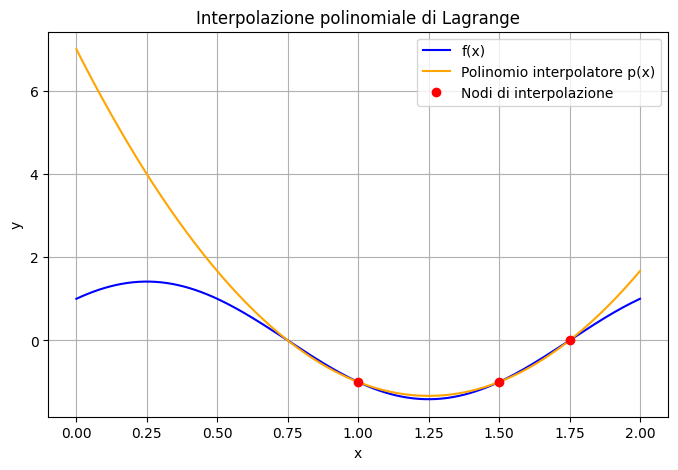

Costante di Lebesgue: 29.000

La costante di Lebesgue misura quanto l'operatore di interpolazione può amplificare gli errori sui dati. 
Un valore elevato indica che piccoli errori nei dati possono portare a grandi errori nell'interpolante. 
È quindi un indicatore della stabilità dell'interpolazione polinomiale rispetto ai nodi scelti.



In [142]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(np.pi * x) + np.sin(np.pi * x)

x_nodes = np.array([1, 1.5, 1.75])
y_nodes = f(x_nodes)

xx = np.linspace(0, 2, 200)
ff = f(xx)

p_vals = InterpL(x_nodes, y_nodes, xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, ff, label="f(x)", color="blue")
plt.plot(xx, p_vals, label="Polinomio interpolatore p(x)", color="orange")
plt.plot(x_nodes, y_nodes, "ro", label="Nodi di interpolazione")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolazione polinomiale di Lagrange")
plt.grid(True)
plt.show()

x_star = 0.75
p_xstar = InterpL(x_nodes, y_nodes, np.array([x_star]))[0]
err_xstar = np.abs(f(x_star) - p_xstar)

x_nodes2 = np.array([0.75, 1, 1.5, 1.75])
y_nodes2 = f(x_nodes2)

# Coefficienti del polinomio interpolatore (opzionale: np.polyfit per confronto)
p2_vals = InterpL(x_nodes2, y_nodes2, xx)

# Calcolo della costante di Lebesgue
# Si valuta la somma dei valori assoluti dei polinomi fondamentali di Lagrange
lebesgue_vals = np.zeros_like(xx)
for j in range(len(x_nodes)):
    p = plagr(x_nodes, j)
    lebesgue_vals += np.abs(np.polyval(p, xx))
lebesgue_const = np.max(lebesgue_vals)

print(f"Costante di Lebesgue: {lebesgue_const:.3f}")
print(
    """
La costante di Lebesgue misura quanto l'operatore di interpolazione può amplificare gli errori sui dati. \nUn valore elevato indica che piccoli errori nei dati possono portare a grandi errori nell'interpolante. \nÈ quindi un indicatore della stabilità dell'interpolazione polinomiale rispetto ai nodi scelti.
"""
)

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**Risolvere un problema mediante Machine Learning significa**:
- Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina le esatte istruzioni per risolvere il problema
edizione

Risposta: PUNTO [**1**]

**2  A cosa serve il validation set?**
-  A trovare i migliori iperparametri del modello
-  Ad addestrare il modello
-  A testare il modello
-  A trovare le etichette dei dati di input

Risposta: PUNTO [**1**]

**3  Una classica rete CNN è solitamente composta da:**  
- Layer convolutivi seguiti da layer di pooling, flatten layer e neuroni completamente connessi
- Layer di pooling seguiti da layer convolutivi, flatten layer e neuroni completamente connessi
- Layer convolutivi seguiti da layer di pooling, flatten layer e softmax
- Layer di pooling seguiti da layer convolutivi, flatten layer e softmax

Risposta: PUNTO [**1**]

**4 Il livello softmax**
- Trasforma i digits della rete in probabilità
- Trasforma le probabilità della rete in digits
- Normalizza i valori di input della rete
- È indispensabile nel task di regressione della rete

Risposta: PUNTO [**1**]


**5 Per una rete neurale, l’apprendimento è legato a:**
- Minimizzare la funzione obiettivo
- Minimizzare la funzione di attivazione
- Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation
- Massimizzare il valore della funzione di training

Risposta: PUNTO [**1**]

**Domande Aperte**

**6. Spiega in modo dettagliato come il learning rate influenza la convergenza di una rete neurale durante il training. Quali sono le conseguenze di un learning rate troppo alto o troppo basso nel training di una rete neurale. Descrivi le principali strategie di  aggiornamentodel  learning rate durante il training di una rete neurale.** [punti 1.5]

**7. Descrivi in dettaglio l'algoritmo di discesa del gradiente con momento. Quali sono le motivazioni che hanno portato alla sua introduzione rispetto alla discesa del gradiente standard? Fornisci la formula matematica dell'aggiornamento dei pesi in questo algoritmo e spiega il ruolo del termine di momento** [punti 3]